# E₁(z)の教訓

* 黒木玄
* 2020-09-28, 2024-01-02 (rerun)

$
\newcommand\real{\operatorname{Re}}
\newcommand\imag{\operatorname{Im}}
$

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#文脈" data-toc-modified-id="文脈-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>文脈</a></span><ul class="toc-item"><li><span><a href="#MITでの講義の宿題の模範解答" data-toc-modified-id="MITでの講義の宿題の模範解答-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>MITでの講義の宿題の模範解答</a></span></li><li><span><a href="#これは何を意味しているのか？" data-toc-modified-id="これは何を意味しているのか？-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>これは何を意味しているのか？</a></span></li><li><span><a href="#最適化の中身の紹介" data-toc-modified-id="最適化の中身の紹介-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>最適化の中身の紹介</a></span></li><li><span><a href="#コードの自動生成機能の重要性" data-toc-modified-id="コードの自動生成機能の重要性-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>コードの自動生成機能の重要性</a></span></li><li><span><a href="#教訓" data-toc-modified-id="教訓-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>教訓</a></span></li><li><span><a href="#「怠惰な人間」という巨大因子を無視してはいけない" data-toc-modified-id="「怠惰な人間」という巨大因子を無視してはいけない-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span><strong>「怠惰な人間」という巨大因子</strong>を無視してはいけない</a></span></li><li><span><a href="#uncorrelated氏による連分数のベンチマークテスト" data-toc-modified-id="uncorrelated氏による連分数のベンチマークテスト-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>uncorrelated氏による連分数のベンチマークテスト</a></span></li><li><span><a href="#補足と感謝" data-toc-modified-id="補足と感謝-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>補足と感謝</a></span></li></ul></li><li><span><a href="#MITでの講義の宿題の解答のコード" data-toc-modified-id="MITでの講義の宿題の解答のコード-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MITでの講義の宿題の解答のコード</a></span><ul class="toc-item"><li><span><a href="#連分数で計算する部分の解説" data-toc-modified-id="連分数で計算する部分の解説-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>連分数で計算する部分の解説</a></span></li></ul></li><li><span><a href="#uncorrelated氏のコード" data-toc-modified-id="uncorrelated氏のコード-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>uncorrelated氏のコード</a></span><ul class="toc-item"><li><span><a href="#最初のバージョンでは-reltol=1e-16-になっていた！(笑)" data-toc-modified-id="最初のバージョンでは-reltol=1e-16-になっていた！(笑)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>最初のバージョンでは reltol=1e-16 になっていた！(笑)</a></span></li><li><span><a href="#連分数展開が効率的でない領域で連分数のコードをテストしている！" data-toc-modified-id="連分数展開が効率的でない領域で連分数のコードをテストしている！-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>連分数展開が効率的でない領域で連分数のコードをテストしている！</a></span></li><li><span><a href="#実践的には決して使われることがない遅いアルゴリズムで比較している！" data-toc-modified-id="実践的には決して使われることがない遅いアルゴリズムで比較している！-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>実践的には決して使われることがない遅いアルゴリズムで比較している！</a></span></li></ul></li><li><span><a href="#uncorrelated氏の計算法がどれだけ遅くなっているか" data-toc-modified-id="uncorrelated氏の計算法がどれだけ遅くなっているか-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>uncorrelated氏の計算法がどれだけ遅くなっているか</a></span><ul class="toc-item"><li><span><a href="#素朴な比較" data-toc-modified-id="素朴な比較-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>素朴な比較</a></span></li><li><span><a href="#連分数展開が有効な領域での比較" data-toc-modified-id="連分数展開が有効な領域での比較-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>連分数展開が有効な領域での比較</a></span></li><li><span><a href="#結論:-論外！" data-toc-modified-id="結論:-論外！-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>結論: 論外！</a></span></li></ul></li></ul></div>

In [1]:
using SymPy
using BenchmarkTools
using Plots
default(fmt=:png)
versioninfo()

Julia Version 1.10.0
Commit 3120989f39 (2023-12-25 18:01 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 12 × Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, skylake)
  Threads: 18 on 12 virtual cores
Environment:
  JULIA_DEPOT_PATH = D:\.julia
  JULIA_NUM_PRECOMPILE_TASKS = 4
  JULIA_NUM_THREADS = 12
  JULIA_PYTHONCALL_EXE = D:\.julia\conda\3\python.exe


## 文脈

### MITでの講義の宿題の模範解答

まずはMITでの講義の宿題の模範解答

* https://nbviewer.jupyter.org/github/stevengj/18S096/blob/iap2017/pset3/pset3-solutions.ipynb

を見て欲しい.  そこでは, 指数積分函数 E₁(z) のJuliaによる実装によって, scipyで採用されているFortranで書かれてたライブラリの5～6倍の速さを実現している.

### これは何を意味しているのか？

これを「Juliaのコンパイラの方がFortranよりも優れた最適化を行うことを意味する」と**誤解**してはいけない！

ある程度以上の性能を持つコンパイラの最適化のレベルはオーダー的にはそう変わらない. 2倍の違いはないと思ってよい.

それではどうしてJuliaで実装された指数積分函数 E₁(z) の方が Fortran で書かれたライブラリの5～6倍の速さで計算できてしまうのだろうか?

Julia側が5～6倍も速くなっているのは, Julia側ではアルゴリズムの最適化をしっかりやっているからである.

コンパイラによる最適化ではなく, 数学的なアルゴリズムの最適化なので, 原理的には同様の最適化は任意のプログラミング言語において可能である.

だから, そういう意味では, 「Juliaが速い」のではなく, 「採用したアルゴリズムが速い」のである.

### 最適化の中身の紹介

しかし, アルゴリズムの最適化は「有理函数の分子と分母をHorner法でべた書きする」というステップを含んでいる.  最大で分子分母がそれぞれ31次と32次の多項式の場合に分子分母をHorner法でべた書きしたコードを書く必要がある. (Taylor展開で計算する部分については最大で37次の多項式をHorner法でべた書きする必要がある.)

そのようなコードを人間が書くことは通常ないし, 人間に書かせることはバグの原因にもなるのでやってはいけないことである.

MITでの宿題の答えではJuliaがLispのような完全なマクロ機能を持っていることを使って, そのようなべた書きのコードを自動的に生成している.

### コードの自動生成機能の重要性

最適化の過程で必要になる試行錯誤の作業においてはそのようなコードの自動生成機能は必須である.

なぜならば, Float64またはComplex{Float64}の場合に, 各複素数ごとに連分数展開をどれだけ長く取れば十分な精度が得られるかを確認し, 領域を適切に区切って, 領域ごとに使用する連分数展開の長さを決めるという作業が必要になるからだ.

Horner法でべた書きしたコードと定義通りに連分数展開しているコードでは誤差の出方が異なる. だから, 十分な精度が得られる次数を決定するためには, Horner法でべた書きしたケースを直接調べる必要がある.

そのような作業においてHorner法によるべた書きのコードを自動生成できないならば, 手間の分量は大変なことになってしまうだろう.

### 教訓

このように原理的に任意のプログラミング言語で可能な最適化であっても, 各プログラミング言語で使える環境の良し悪しによって, 「人間が最適化をやる気になれるかどうか」は大きく変わってしまうのだ.

おそらくそのような理由でFortranで書かれたライブラリは十分に最適化されなかったのだろう.

以上のストーリーの教訓はこうである. 

* コンパイラの最適化性能だけが, 現実に使用されているライブラリの実行速度を決めるのではない.
* ライブラリを書いた人がシャープな最適化をやる気になれるという条件が非常に重要である.
* そのためには, 数式処理系の支援が得られたり, 視覚化を駆使した試行錯誤が容易だったり, コードの自動生成が容易であったりすることが重要になる.

Juliaはそれらの条件をすべて満たしていたおかげで最適化の作業が容易になり, 宿題の模範解答に収まる内容で, 既存のライブラリよりも数倍速いコードを実現することができたのである.

### **「怠惰な人間」という巨大因子**を無視してはいけない

実践的な状況における実効的な速さについて考えるときには, コンパイラの最適化の性能が主な因子であると思っては**いけない**. 

**「怠惰な人間」という巨大因子**を無視している「速さ」に関する議論はナンセンスである. 

コンパイラの最適化の性能のみに特化したベンチマークテストを行っただけでは, 実践的な状況における実効的な速さについては大したことは分からない.

### uncorrelated氏による連分数のベンチマークテスト

以上のような話を私はツイッターでよくしていた.

最近(2020年9月28日), 私がよく話題にしていた[MITの宿題の答えの一部分をコピーしたと思われるコードを含むベンチマークテスト](https://github.com/uncorrelated/ExpIntCF)を発表している人(uncorrelated氏)を発見した. その内容を見たところ, 以上で述べたような考え方を無視しているだけではなく, やっていることがあまりにも滅茶苦茶であった. そのような代物が**まともなもの扱い**されることは有害だと思ったので, このノートを書くことにした.

### 補足と感謝

このノートを書いた真の狙いは, MITの宿題の答え及びその帰結について詳しく説明することによって, 複雑なコードの自動生成可能性がどれだけ重要であるかをみんなに知ってもらうことである.  MITの宿題の模範解答のコードはuncorrelated氏のコードよりも100倍から1000倍も速い. 

そのような桁違いに遅いコードでベンチマークテストを行ったuncorrelated氏のおかげで, それなりに有益なノートを書くことができたことには感謝の意を示したい. どうもありがとう!

## MITでの講義の宿題の解答のコード

次のセルのコードは本質的に

* https://nbviewer.jupyter.org/github/stevengj/18S096/blob/iap2017/pset3/pset3-solutions.ipynb

からのコピーである.  ただし, Julia v1 以上に対応するために

* [Polynomials.jl/src/polynomials/Poly.jl](https://github.com/JuliaMath/Polynomials.jl/blob/6def89946e386085349310b581f8286c2093855f/src/polynomials/Poly.jl)
* https://github.com/JuliaLang/julia/blob/master/HISTORY.md#breaking-changes

を参考にしながら修正してある:

* `eulergamma` の代わりに `MathConstants.eulergamma` を使うようにした.
* `Polynomials.Poly` の代わりに `Polynomials.PolyCompat.Poly` を使用するようにした.
* `@macrocall` の文法の breaking change に対応した. (`Base.LineNumberNode(@__LINE__, Symbol(@__FILE__)),` を挿入した.)
* 一ヶ所, `@E₁_cf` となっている部分を `@E₁_cf64` に修正した.

函数 $E_1(z)$ の実装結果の定義域は $\real(z) > 0$ である.

函数 $E_1(z)$ は $\real(z)^2 + 0.233\imag(z)^2 \ge 7.84 = 2.8^2$ ならば連分数展開で計算され, それ以外の場合にはTaylor展開で計算される.  連分数展開は「無限遠近傍」で効率的な数値計算法であり, 原点近傍では効率が悪いことに注意せよ.

In [2]:
# https://github.com/mitmath/18S096/blob/iap2017/pset3/pset3-solutions.ipynb

# SOLUTION code
# n coefficients of the Taylor series of E₁(z) + log(z), in type T:
function E₁_taylor_coefficients(::Type{T}, n::Integer) where T<:Number
    n < 0 && throw(ArgumentError("$n ≥ 0 is required"))
    n == 0 && return T[]
    n == 1 && return T[-MathConstants.eulergamma]
    # iteratively compute the terms in the series, starting with k=1
    term::T = 1
    terms = T[-MathConstants.eulergamma, term]
    for k=2:n
        term = -term * (k-1) / (k * k)
        push!(terms, term)
    end
    return terms
end

# SOLUTION code
macro E₁_taylor64(z, n::Integer)
    c = E₁_taylor_coefficients(Float64, n)
    taylor = Expr(:macrocall, Symbol("@evalpoly"),
        Base.LineNumberNode(@__LINE__, Symbol(@__FILE__)),
        :t, c...)
    quote
        let t = $(esc(z))
            $taylor - log(t)
        end
    end
end

# compute E₁ via n terms of the continued-fraction expansion, implemented
# in the simplest way:
function E₁_cf(z::Number, n::Integer)
    # starting with z seems to give many fewer terms for intermediate |z| ~ 3
    cf::typeof(inv(z)) = z
    for i = n:-1:1
        cf = z + (1+i)/cf
        cf = 1 + i/cf
    end
    return exp(-z) / (z + inv(cf))
end

# SOLUTION code
# for numeric-literal coefficients: simplify to a ratio of two polynomials:
import Polynomials
# return (p,q): the polynomials p(x) / q(x) corresponding to E₁_cf(x, a...),
# but without the exp(-x) term
function E₁_cfpoly(n::Integer, ::Type{T}=BigInt) where T<:Real
    q = Polynomials.PolyCompat.Poly(T[1])
    p = x = Polynomials.PolyCompat.Poly(T[0,1])
    for i = n:-1:1
        p, q = x*p+(1+i)*q, p # from cf = x + (1+i)/cf = x + (1+i)*q/p
        p, q = p + i*q, p     # from cf = 1 + i/cf = 1 + i*q/p
    end
    # do final 1/(x + inv(cf)) = 1/(x + q/p) = p/(x*p + q)
    return p, x*p + q
end
macro E₁_cf64(x, n::Integer)
    p,q = E₁_cfpoly(n, BigInt)
    evalpoly = Symbol("@evalpoly")
    num_expr = Expr(:macrocall, evalpoly, 
        Base.LineNumberNode(@__LINE__, Symbol(@__FILE__)),
        :t, Float64.(Polynomials.coeffs(p))...)
    den_expr = Expr(:macrocall, evalpoly,
        Base.LineNumberNode(@__LINE__, Symbol(@__FILE__)),
        :t, Float64.(Polynomials.coeffs(q))...)
    quote
        let t = $(esc(x))
            exp(-t) * $num_expr / $den_expr
        end
    end
end

# SOLUTION:
function E₁(z::Union{Float64,Complex{Float64}})
    x² = real(z)^2
    y² = imag(z)^2
    if x² + 0.233*y² ≥ 7.84 # use cf expansion, ≤ 30 terms
        if (x² ≥ 546121) & (real(z) > 0) # underflow
            return zero(z)
        elseif x² + 0.401*y² ≥ 58.0 # ≤ 15 terms
            if x² + 0.649*y² ≥ 540.0 # ≤ 8 terms
                x² + y² ≥ 4e4 && return @E₁_cf64 z 4
                return @E₁_cf64 z 8
            end
            return @E₁_cf64 z 15
        end
        return @E₁_cf64 z 30
    else # use Taylor expansion, ≤ 37 terms
        r² = x² + y²
        return r² ≤ 0.36 ? (r² ≤ 2.8e-3 ? (r² ≤ 2e-7 ? @E₁_taylor64(z,4) :
                                                       @E₁_taylor64(z,8)) :
                                         @E₁_taylor64(z,15)) :
                          @E₁_taylor64(z,37)
    end
end
E₁(z::Union{T,Complex{T},Rational{T},Complex{Rational{T}}}) where T<:Integer = E₁(float(z))

E₁ (generic function with 2 methods)

### 連分数で計算する部分の解説

函数 $E_1(z)$ の定義域は $\real(z) > 0$ であり, 函数 $E_1(z)$ は $\real(z)^2 + 0.233\imag(z)^2 \ge 7.84 = 2.8^2$ ならば連分数展開で計算され, それ以外の場合にはTaylor展開で計算される. 

使用される連分数の定義は `E₁_cf(z)` を見ればわかる.  コードでは見難いので数式で表示させてみよう. 

In [3]:
@syms z
E₁_cf(z, 4)

                  -z                 
                 e                   
-------------------------------------
                    1                
z + ---------------------------------
                      1              
    1 + -----------------------------
                        2            
        z + -------------------------
                          2          
            1 + ---------------------
                            3        
                z + -----------------
                              3      
                    1 + -------------
                                4    
                        z + ---------
                                  4  
                            1 + -----
                                    5
                                z + -
                                    z

これは $e^{-z}$ の因子を除けば有理函数である. その分子と分母は次のようになる.

In [4]:
E₁_cf(z, 4).simplify()

  / 5       4        3        2              \  -z 
  \z  + 19*z  + 107*z  + 229*z  + 314*z + 250/*e   
---------------------------------------------------
 6       5        4        3        2              
z  + 20*z  + 125*z  + 320*z  + 480*z  + 480*z + 120

連分数を定義通りにループを回して計算すると遅くなってしまう. 以下のように有理函数の分子分母をHorner法のコードをべた書きすると速くなる.  この例ではそれをJuliaのマクロ(コードの自動生成)を使って実現している.

In [5]:
@E₁_cf64(z, 4)

                                                                   -z   
   (z*(z*(z*(z*(1.0*z + 19.0) + 107.0) + 229.0) + 314.0) + 250.0)*e     
------------------------------------------------------------------------
z*(z*(z*(z*(z*(1.0*z + 20.0) + 125.0) + 320.0) + 480.0) + 480.0) + 120.0

以下の場合には分子が31次, 分母が32次の多項式になっている(連分数展開).

In [6]:
p, q = E₁_cfpoly(30, BigInt)
display(p)
display(q)

Polynomials.PolyCompat.Poly(32850134603075549658429141811200000 + 525249106304478861406405931827200000*x + 2436295969082344967826186947788800000*x^2 + 5345665570450086412726187222630400000*x^3 + 6887791716432170467320358856294400000*x^4 + 5894640462746599250997685368913920000*x^5 + 3617454271709266073416077811384320000*x^6 + 1669693640436399174051959293870080000*x^7 + 596570722118358294816001764311040000*x^8 + 167883225850416943531400028733440000*x^9 + 37634307323967439806203471020032000*x^10 + 6777941025826303620427455823872000*x^11 + 987893996979741457441180520448000*x^12 + 117289025530503745477087678464000*x^13 + 11409613921869076752936136704000*x^14 + 913983584551290772650322329600*x^15 + 60541461774828696975236985600*x^16 + 3326366720514781191333254400*x^17 + 151903960597566792817171200*x^18 + 5770458569119763827123200*x^19 + 182256236872440965942400*x^20 + 4776686984207188828800*x^21 + 103496938216461763200*x^22 + 1843086617708169600*x^23 + 26746484610023100*x^24 + 312464249713044*x^25 + 2888176140684*x^26 + 20598169256*x^27 + 109123373*x^28 + 403653*x^29 + 929*x^30 + x^31)

Polynomials.PolyCompat.Poly(8222838654177922817725562880000000 + 246685159625337684531766886400000000*x + 1796690245937876135673035489280000000*x^2 + 5687463402473063282260180992000000000*x^3 + 9985609690667315021775480422400000000*x^4 + 11156062249434090852188566585344000000*x^5 + 8659163030265238847241125560320000000*x^6 + 4948944811297890626143907610624000000*x^7 + 2162395488717269044560921600000000000*x^8 + 739379079697697326643941785600000000*x^9 + 200708743939428652118267940864000000*x^10 + 43673108079197530763953643520000000*x^11 + 7674052784672899449678357504000000*x^12 + 1095910115792837446567065600000000*x^13 + 127931675576901755312033280000000*x^14 + 12271399967040162766020403200000*x^15 + 971590423310912945475936000000*x^16 + 63731163664902003913843200000*x^17 + 3472991476781865358320000000*x^18 + 157505267057963112288000000*x^19 + 5948226414036000974880000*x^20 + 186934629395432318400000*x^21 + 4878417209153932080000*x^22 + 105314179609548000000*x^23 + 1869529042385550000*x^24 + 27056121087733920*x^25 + 315332149872600*x^26 + 2908666385520*x^27 + 20706891750*x^28 + 109526100*x^29 + 404581*x^30 + 930*x^31 + x^32)

In [7]:
@vars z
print("p(z) = ")
show(@evalpoly z Float64.(Polynomials.coeffs(p))...)
print("\n\nq(z) = ")
show(@evalpoly z Float64.(Polynomials.coeffs(q))...)

LoadError: LoadError: UndefVarError: `@vars` not defined
in expression starting at In[7]:1

以下は37次の多項式である(Taylor展開).

In [8]:
r = Polynomials.PolyCompat.Poly(E₁_taylor_coefficients(Float64, 37))

Polynomials.PolyCompat.Poly(-0.5772156649015329 + 1.0*x - 0.25*x^2 + 0.05555555555555555*x^3 - 0.010416666666666666*x^4 + 0.0016666666666666666*x^5 - 0.0002314814814814815*x^6 + 2.834467120181406e-5*x^7 - 3.1001984126984127e-6*x^8 + 3.0619243582206544e-7*x^9 - 2.7557319223985888e-8*x^10 + 2.2774643986765196e-9*x^11 - 1.7397297489890078e-10*x^12 + 1.235311064370893e-11*x^13 - 8.193389712664086e-13*x^14 + 5.098109154546542e-14*x^15 - 2.9871733327421146e-15*x^16 + 1.6537983849091293e-16*x^17 - 8.677337204770122e-18*x^18 + 4.326650129802277e-19*x^19 - 2.0551588116560816e-20*x^20 + 9.320448125424406e-22*x^21 - 4.0439960874775317e-23*x^22 + 1.6818131176655143e-24*x^23 - 6.715573212900491e-26*x^24 + 2.5787801137537886e-27*x^25 - 9.536908704710756e-29*x^26 + 3.4013666162205716e-30*x^27 - 1.1713890132392274e-31*x^28 + 3.89998720222335e-33*x^29 - 1.2566625429386349e-34*x^30 + 3.9229840050113474e-36*x^31 - 1.1876221108921071e-37*x^32 + 3.4897986729611965e-39*x^33 - 9.962228045650474e-41*x^34 + 2.7650265596091113e-42*x^35 - 7.467278517462877e-44*x^36 + 1.9636378862575864e-45*x^37)

In [9]:
@vars z
print("r(z) = ")
show(@evalpoly z Float64.(Polynomials.coeffs(r))...)

LoadError: LoadError: UndefVarError: `@vars` not defined
in expression starting at In[9]:1

計算したいのは, Float64の場合なので, 適当に分割された領域ごとにどれだけ長い連分数(もしくはTaylor展開)を計算すれば十分な精度が得られるかを前もって計算して確認することができる.  上に引用したMITでの宿題の模範解答のコード `E₁(z)` はそのようにして作られている.

## uncorrelated氏のコード

以下に引用したuncorrelated氏のコードは

* https://github.com/uncorrelated/ExpIntCF/blob/master/e1_cf.jl

より.  ただし, 函数名に `_uc` を付け加えてある.

In [10]:
# https://github.com/uncorrelated/ExpIntCF/blob/master/e1_cf.jl

function E₁_cf_uc(z::Number, n::Integer)
    cf::typeof(z) = z
    for i = n:-1:1
        cf = z + (1+i)/cf
        cf = 1 + i/cf
    end
    return exp(-z) / (z + inv(cf))
end

function E₁_cf_uc(z::Number, reltol=1e-12)
    for n = 1:1000
        s = E₁_cf_uc(z, n)
        d = E₁_cf_uc(z, 2n)
        if abs(s - d) <= reltol*abs(d)
            return d
        end
    end
    error("iteration limit exceeded!")
end

E₁_cf_uc (generic function with 3 methods)

以下に再引用するMITの宿題の模範解答の一部分(in the simple wayで実装されているので, このコードは速くない)と上に引用したuncorrelated氏の `E₁_cf_uc(z::Number, n::Integer)` はほぼ同じであることに注意せよ.  これが単なる偶然なわけがない.

In [11]:
# 再掲
# https://nbviewer.jupyter.org/github/stevengj/18S096/blob/iap2017/pset3/pset3-solutions.ipynb
# より

# compute E₁ via n terms of the continued-fraction expansion, implemented
# in the simplest way:
function E₁_cf(z::Number, n::Integer)
    # starting with z seems to give many fewer terms for intermediate |z| ~ 3
    cf::typeof(inv(z)) = z
    for i = n:-1:1
        cf = z + (1+i)/cf
        cf = 1 + i/cf
    end
    return exp(-z) / (z + inv(cf))
end

E₁_cf (generic function with 1 method)

### 最初のバージョンでは reltol=1e-16 になっていた！(笑)

なんと驚くべきことに, それの最初のバージョン

* https://github.com/uncorrelated/ExpIntCF/blob/031ab9925ad08870737e771c062c12df90ab9750/e1_cf.jl

では, 

```julia
function E₁_cf(z::Number, reltol=1e-16)
    略
end
```

となっていた. これだと reltol が machine epsilon (Float64のeps())より小さくなってしまう(笑).

In [12]:
eps()

2.220446049250313e-16

In [13]:
1e-16 < eps()

true

### 連分数展開が効率的でない領域で連分数のコードをテストしている！

さらに, 現在のバージョン

* https://github.com/uncorrelated/ExpIntCF/blob/90669379f0f1ca8478ddc3677f78bccfbcebcbdd/e1_cf.jl

においても,

```julia
function MakeMatrix(s::Number, e::Number, length::Integer)
	x = range(s, e, length=length)
	return [E₁_cf(x+y*im) for y in x, x in x]
end

m = @time MakeMatrix(0.1, 5, 100)
```

となっている.  これは無限遠の近くでの展開である連分数展開を原点に近い $0.1\le \real(z), \imag(z)\le 5$ で使用していることになる. そのような計算は恐ろしく効率が悪い.

### 実践的には決して使われることがない遅いアルゴリズムで比較している！

さらに, テストに使用されたアルゴリズムは遅いことが前もって分かっているアルゴリズムである. 

次のセルの函数 `E₁_cf_uc(z::Number, n::Integer)` はMITでの宿題の解答の函数 `E₁_cf(z::Number, n::Integer)` のほぼコピーである. なぜか完全なコピーになっておらず, `cf::typeof(inv(z)) = z` が `cf::typeof(z) = z` になっている.

その函数はそこでは最適化前のコード扱いされている. `E₁_cf(z::Number, n::Integer)` は有限連分数を定義通りに計算する函数であり, 本質的に有限連分数で定義された有理函数の値を計算するコードになっている.  有利函数は多項式分の多項式であり, 多項式の数値計算はHorner法のコードをべた書きすると速くなる.  MITの宿題の答えではそれをJuliaのマクロを使って実現している.

実践的な状況での実効的な速さを比較したければ, そのマクロを使って実現されているコードのアルゴリズムで比較するべきだろう. 

しかし, 問題はJuliaのように完全なマクロを持たないプログラミング言語では, Horner法のべた書き部分を実現する手間が増える. だから, その増えた手間の分も評価しないと不公平な比較になってしまう.

ところが, uncorrelated氏はそのような実践的な状況における実効的な速さのフェアな比較をしようとせずに, わざわざ最初から遅いと分かっているコードで比較している. (後で具体的に確認するが, 確認されたケースでは, MITでの宿題の模範解答と比較すると100倍から1000倍もuncorrelated氏が採用したコードは遅い.)

**補足:** `cf::typeof(inv(z)) = z` が `cf::typeof(z) = z` に変更してしまったせいで, uncorrelated氏の `E₁_cf_uc(z::Number, n::Integer)` では `z` が整数型の場合の値を計算できない.  (MITでの宿題の模範解答の `E₁_cf(z::Number, n::Integer)` では計算できる.)

In [14]:
E₁_cf_uc(3, 4) # by uncorrelated

LoadError: InexactError: Int64(4.666666666666667)

In [15]:
E₁_cf(3, 4) # solution of MIT homework

0.01304864489471965

## uncorrelated氏の計算法がどれだけ遅くなっているか

uncorrelated氏の計算法がどれだけ遅くなっているかを確認してみよう.

### 素朴な比較

In [16]:
# 次の函数は
# https://github.com/uncorrelated/ExpIntCF/blob/master/e1_cf.jl
# より. 函数名に `_uc` を付け加えてある
function MakeMatrix_uc(s::Number, e::Number, length::Integer)
    x = range(s, e, length=length)
    return [E₁_cf_uc(x+y*im) for y in x, x in x]
end

M_uc = MakeMatrix_uc(0.1, 5, 100)
print("uncorrelated's code:")
@btime MakeMatrix_uc(0.1, 5, 100);

uncorrelated's code:  387.277 ms (2 allocations: 156.30 KiB)


In [17]:
function MakeMatrix_mit(s::Number, e::Number, length::Integer)
    x = range(s, e, length=length)
    return [E₁(x+y*im) for y in x, x in x]
end

M_mit = MakeMatrix_mit(0.1, 5, 100)
print("MIT homework solution:")
@btime MakeMatrix_mit(0.1, 5, 100);

MIT homework solution:  726.300 μs (2 allocations: 156.30 KiB)


数値が似ていること, 特にメモリ割当の数値が完全に同じであることによって, 後者に `m` の文字が付け加わっていることを見落とさないようにせよ！(笑) 

uncorrelated氏のコードとMITの宿題の模範解答のコードでは計算速度の__桁が3桁も違う！__ __秒とミリ秒の違いがある！__

以下を見ればわかるように, uncorrelated氏のコードとMITの宿題の答えの計算結果の差の相対誤差は1e-13未満になっている. uncorrelated氏はreltol=1e-12と設定していたので, これは妥当な結果だろう. 

ヒートマップのカラーバーのメモリは「2つの値の比と1の差の絶対値の常用対数」である. 色が明るい場所ほど違いが大きい.

max_relerr = 3.9079971469117816e-14


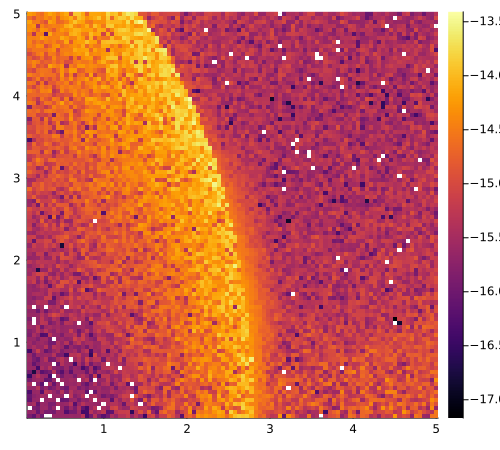

In [18]:
max_relerr = maximum(@. abs(M_uc/M_mit - 1))
@show max_relerr
x = y = range(0.1, 5, length=100)
heatmap(x, y, log10.(abs.(M_uc./M_mit .- 1)); size=(500, 450))

### 連分数展開が有効な領域での比較

上の比較において, MITの宿題の解答の E₁_cf64(z) は原点の近傍ではTaylor展開を使って効率的に計算するようになっている.  一方, uncorrelated氏の計算法では原点の近傍でも効率の悪い連分数展開を使っている.  これだと余りにもuncorrelated氏にとって不利過ぎるので, 実部が $3$ 以上の確実に連分数展開が有効な領域で速度を比較してみよう.

In [19]:
N_uc = MakeMatrix_uc(3, 20, 100)
print("uncorrelated's code:")
@btime MakeMatrix_uc(3, 20, 100);

uncorrelated's code:  27.782 ms (2 allocations: 156.30 KiB)


In [20]:
N_mit = MakeMatrix_mit(3, 20, 100)
print("MIT homework solution:")
@btime MakeMatrix_mit(3, 20, 100);

MIT homework solution:  589.200 μs (2 allocations: 156.30 KiB)


連分数展開が確実に有効な領域においても, 計算速度が__2桁も違う！__

max_relerr = 3.414456306375001e-15


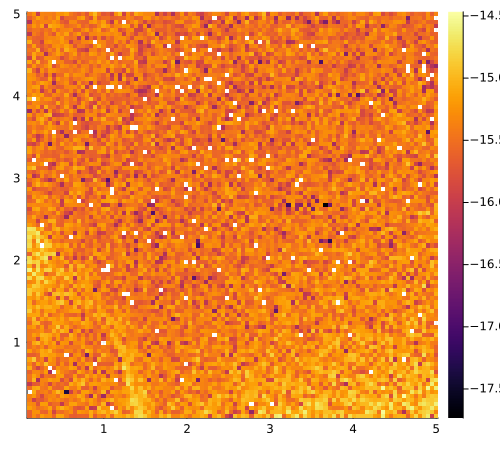

In [21]:
max_relerr = maximum(@. abs(N_uc/N_mit - 1))
@show max_relerr
x = y = range(0.1, 5, length=100)
heatmap(x, y, log10.(abs.(N_uc./N_mit .- 1)); size=(500, 450))

ヒートマップのカラーバーのメモリは「2つの値の比と1の差の絶対値の常用対数」である.　色が明るい場所ほど違いが大きい.

### 結論: 論外！

以上のようにuncorrelated氏によるベンチマークテストは論外な内容であると言ってよい.

実践的に使用可能なレベルのコードよりも百倍から千倍も遅いコードでベンチマークテストをやることにどういう意味があるのだろうか?

本当にやるべき作業はJuliaで実現したアルゴリズムと同じアルゴリズムをCまたはFortranで実装して, Juliaよりどれだけ速くなるかを確認することだと思われる. 私は実際に速くなると信じている. そのようなコードは貴重なライブラリとして広く配布する価値があるかもしれない.

しかし, 適切なアルゴリズムの調整には試行錯誤が必須であり, そのような試行錯誤は現代的な「何でも揃っているプログラミング言語環境」でないと現実にはやる気になれないだろう. 

さらに, このノートに引用したアルゴリズムを手間暇かけてCやFortranに移植しても, 「何でも揃っている側のプログラミング言語環境」におけるさらなるアルゴリズムの改良によって時代遅れになってしまうかもしれない. 

CまたはFortranに移植する過程では, CまたはFortranで直接書くには面倒な部分のコードを「何でも揃っている側のプログラミング言語環境」で自動生成するようにした方がよいだろう. 

そういうことができなければ, CまたはFortranでHorner法のべた書きが必要になる. 誰かがんばって試してくれ！(笑)